## Section E: Multiclass Perceptron

In this section, you are asked to demonstrate your understanding of linear models for classification. You expand the binary-class perceptron algorithm that is covered in Activity 1 of Module 3 into a multiclass classifier.

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass classification.  Here, the input x and the output y are drawn from arbitrary sets. A feature representation function f(x,y) maps each possible input/output pair to a finite-dimensional real-valued feature vector. The feature vector is multiplied by a weight vector w, the resulting score is used to choose among many possible outputs. Learning again iterates over the examples, predicting an output for each, leaving the weights unchanged when the predicted output matches the target, and changing them when it does not. The update becomes: $w{t+1}=w{t}+f(x,y)-tn.$

This multiclass feedback formulation reduces to the original perceptron when x is a real-valued vector, y is chosen from {0,1}, and f(x,y)=yx.

### Question 6 :Multiclass Perceptron
> ##### 1. Loading the train and test datasets

In [27]:
# Loading traning data in Task1_train_dataframe
train_data = read.csv("Task1D_train.csv")
# Loading test data in Task1A_test_dataframe
test_data = read.csv("Task1D_test.csv")

> ##### 2. Implement the multiclass perceptron

In [28]:
# Length of the train data
train.len <- nrow(train_data)
# Length of the test data
test.len <- nrow(test_data)
# Training data from train_data
train.data <- train_data[,-5]
#Testing data from test_data
test.data <- test_data[,-5] 
# Training label from train_data
train.label <- train_data[,5]
# Testing label from test_data
test.label <- test_data[,5]

In [29]:
## Basis function 
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

> ##### Error function
> Arguments
>1. train.len :- train data length
>2. weights :- data frame of different weights for classification
>3. classes :- vector of classes
>4. train.label :- train label

It returns the percentage of missclassification

In [20]:
error <- function(train.len,weights,Phi,classes,train.label){
    # Variable to keep count of misclassification
    mis_class = 0
    for (i in 1:train.len){
        # Getting the index number of the argument which has the maximum value
        c_ind = data.frame(sort(c(Phi[i,]%*%weights[,1],Phi[i,]%*%weights[,2],Phi[i,]%*%weights[,3]),
                                  index.return = TRUE))[3,2]
        # Checking if predicted class and original label are same.
        if (classes[c_ind]!=train.label[i]){
            # If label is different then increamenting the count of the variable.
            mis_class = mis_class + 1
        }
    }
    return (mis_class/train.len*100)
}

> ##### Initialization

In [21]:
# Initialization
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion

tau <- 1 # iteration counter
tau.max <- 100 # Maximum number of iterations


W1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector for class c1
W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W1

W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector For class c2
W2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W2

W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector for class W3
W3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W3

# Vector of different classes from data set  
classes <- as.character(unique(unlist(test_data["y"])))
# Creating a data frame to have all the weights in it
weights <- data.frame(W1=W1[tau,],W2=W2[tau,],W3=W3[tau,])

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors

error.trace[1] <- error(train.len,weights,Phi,classes,train.label) # record error for initial weights
 
terminate <- FALSE # termination status

> We learn the model parameter using SGD below :

In [22]:
# Main loop
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- train.label[train.index]
    
    for (i in 1:train.len){
        if (tau == tau.max) {break}
        # Getting the index number of the argument which has the maximum value
        c_ind = data.frame(sort(c(Phi[i,]%*%weights[,1],Phi[i,]%*%weights[,2],Phi[i,]%*%weights[,3]),
                                  index.return = TRUE))[3,2]
        
        # look for missclassified samples
        if (classes[c_ind]!=T[i]){
            
            weights[,c_ind] <- weights[,c_ind] - eta * Phi[i,] 
            
            # Finding the index number of original class label from classes vector 
            original_c_indx = match(T[i],classes)
            # updating the values of corresponding column in weights dataframe to have the latest value of weight.
            weights[,original_c_indx] <- weights[,original_c_indx] + eta * Phi[i,]
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W1[tau,] <- weights[,1];W2[tau,] <- weights[,2];W3[tau,] <- weights[,3]
            
            # update the record of error
            error.trace[tau] <- error(train.len,weights,Phi,classes,T)
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(error.trace[tau]-error.trace[tau-1]) <= epsilon 
    
    
}
# cut the empty part of the matrix (when the loop stops before tau == tau.max)
W1 <- W1[1:tau,];W2 <- W2[1:tau,];W2 <- W2[1:tau,] 

> ##### 3. Multiclass Perceptron with Neta= 0.09 

In [23]:
## Basis function 
test_phi <- as.matrix(cbind(1, test.data)) # add a column of 1 as phi_0

In [24]:
# Initialization
eta <- 0.09 # Learning rate
epsilon <- 0.001 # Stoping criterion

tau <- 1 # iteration counter
tau.max <- 100 # Maximum number of iterations


W1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector for class c1
W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W1

W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector For class c2
W2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W2

W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector for class W3
W3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector W3

# Vector of different classes from data set  
classes <- as.character(unique(unlist(test_data["y"])))
# Creating a data frame to have all the weights in it
weights <- data.frame(W1=W1[tau,],W2=W2[tau,],W3=W3[tau,])

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors

error.trace[1] <- error(train.len,weights,Phi,classes,train.label) # record error for initial weights
 
terminate <- FALSE # termination status

# Total length of the mini_batch error
total.batch <- train.len%/%5
# Data frame to hole the mini batch number and corresponding error
mini_batch_error <- data.frame("Number"=1:total.batch,"error"=rep(0,total.batch))
# Variable for updating error after processing every 5 training data points
count <- 1 

In [25]:
# Main loop
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- train.label[train.index]
    
    for (i in 1:train.len){
        if (tau == tau.max) {break}
        # Getting the index number of the argument which has the maximum value
        c_ind = data.frame(sort(c(Phi[i,]%*%weights[,1],Phi[i,]%*%weights[,2],Phi[i,]%*%weights[,3]),
                                  index.return = TRUE))[3,2]
        
        # look for missclassified samples
        if (classes[c_ind]!=T[i]){
            
            weights[,c_ind] <- weights[,c_ind] - eta * Phi[i,] 
            
            # Finding the index number of original class label from classes vector 
            original_c_indx = match(T[i],classes)
            # updating the values of corresponding column in weights dataframe to have the latest value of weight.
            weights[,original_c_indx] <- weights[,original_c_indx] + eta * Phi[i,]
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W1[tau,] <- weights[,1];W2[tau,] <- weights[,2];W3[tau,] <- weights[,3]
            
            # update the record of error
            error.trace[tau] <- error(train.len,weights,Phi,classes,T)
        }
        
        if(i%%5 == 0 ){
            mini_batch_error[count,2] <- error(test.len,weights,test_phi,classes,test.label)
            count <- count+1
        }
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(error.trace[tau]-error.trace[tau-1]) <= epsilon 
    
    
}
# cut the empty part of the matrix (when the loop stops before tau == tau.max)
W1 <- W1[1:tau,];W2 <- W2[1:tau,];W2 <- W2[1:tau,] 

> ##### Plotting test error vs Number of Mini Batches

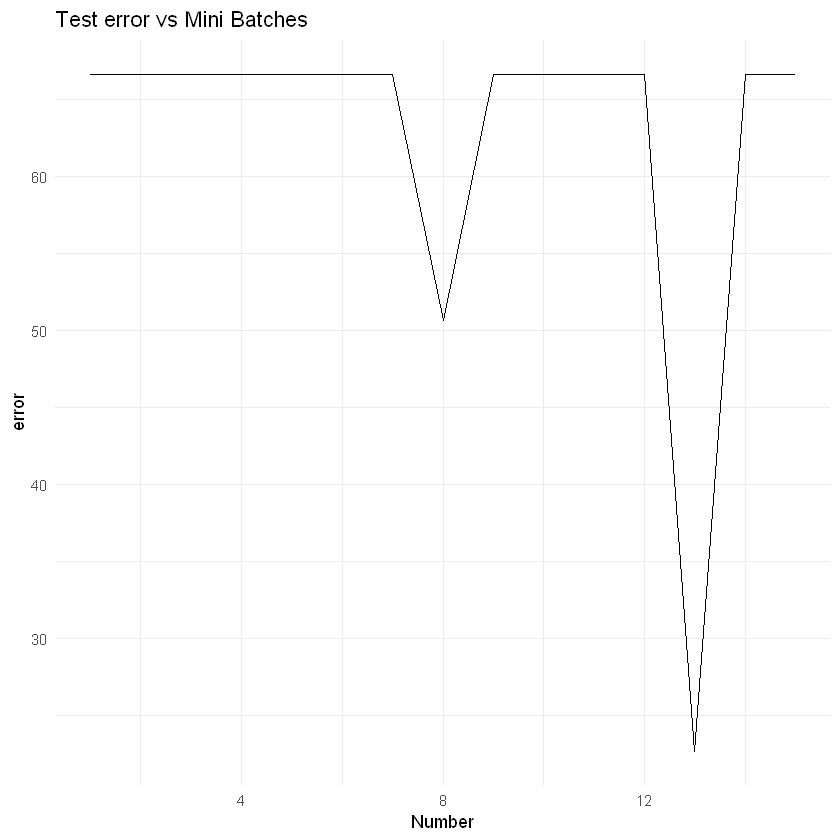

In [32]:
library(ggplot2)
ggplot(mini_batch_error,aes(x=Number,y=error))+geom_line(color="blue") +
geom_line() + ggtitle('Test error vs Mini Batches') + theme_minimal()

> When tried running the code number of times, the batch number giving the minimum test varies, hence we cannot say anything very confirm about the optimal batch number.
> But when run once, we can conclude the optimal batch number which gives the least test error.